In [26]:
import pymc3 as pm
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import operator

In [27]:
%matplotlib inline

In [28]:
df = pd.read_csv('df_concat.csv')

In [ ]:
#

with pm.Model() as hier_pymc:
    
    # define hyperpriors for intercept based on parent
    succ_mean = pm.Normal('parent_mean', mu=0, sigma=10)
    succ_sd = pm.HalfCauchy('parent_sd', beta =10)
    
    # Define priors for intercept and regression coefficients.
    
    succ_mean_0 = pm.Normal('alpha', mu=succ_mean, sigma=succ_sd, shape=len(df_17.ClinicNames.unique()))
    succ_sd_0 = pm.Normal('alpha', mu=succ_mean, sigma=succ_sd, shape=len(df_17.ClinicNames.unique()))
    
    
    priors = {'Intercept': Normal.dist(mu=sat_data.sat_t.mean(), sigma=sat_data.sat_t.std()),
              'spend': Normal.dist(mu=grp_mean, sigma=grp_sd),
              'stu_tea_rat': Normal.dist(mu=grp_mean, sigma=grp_sd),
              'salary': Normal.dist(mu=grp_mean, sigma=grp_sd),
              'prcnt_take': Normal.dist(mu=grp_mean, sigma=grp_sd)
              }
    
    # Define Hierachical Linear Model
    GLM.from_formula(
        'sat_t ~ spend + stu_tea_rat + salary + prcnt_take', sat_data, priors=priors)
    
    
    trace_sat = sample(2000, cores=2)

In [ ]:
# Simple non-linear regression

In [9]:
df.columns

Index(['Unnamed: 0', 'PrevClinName1', 'ClinCityCode', 'ClinStateCode', 'Year',
       'ICSI_Rate', 'PGD_Rate', 'ND_TransLB1', 'ND_TransLB2', 'ND_TransLB3',
       'ND_TransLB4', 'TotNumCyclesAll', 'TransFrozEmbAll', 'ClinicNames'],
      dtype='object')

In [5]:
df["ClinicNames"]

0             ART FERTILITY PROGRAM OF ALABAMA BIRMINGHAM
1                 CENTER FOR REPRODUCTIVE MEDICINE MOBILE
2                   WEST VALLEY FERTILITY CENTER GLENDALE
3       ARIZONA REPRODUCTIVE MEDICINE SPECIALISTS, LLC...
4                    FERTILITY TREATMENT CENTER, PC TEMPE
                              ...                        
3161    AURORA HEALTH CARE-AURORA FERTILITY SERVICES G...
3162    FROEDTERT & MEDICAL COLLEGE OF WISCONSIN MENOM...
3163    UNIVERSITY OF WISCONSIN-GENERATIONS FERTILITY ...
3164              WISCONSIN FERTILITY INSTITUTE MIDDLETON
3165    AURORA HEALTH CARE-AURORA FERTILITY SERVICES, ...
Name: ClinicNames, Length: 3166, dtype: object

In [4]:
clinic = 'ART FERTILITY PROGRAM OF ALABAMA BIRMINGHAM'

In [5]:
data_plot = df[df["ClinicNames"]==clinic]

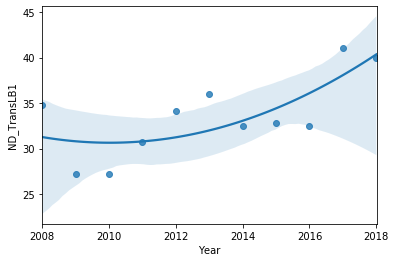

In [10]:
sns.regplot(data = data_plot,x='Year',y='ND_TransLB1',order=2)

In [187]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import Pipeline
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.preprocessing import FunctionTransformer

In [166]:
model = Pipeline([('poly', PolynomialFeatures(degree=3)), 
                  ('linear', LinearRegression(fit_intercept=False))])

In [167]:
x= data_plot['Year'].values.reshape(-1,1)
y = data_plot['ND_TransLB1'].values.reshape(-1,1)

In [168]:
polynomial_features= PolynomialFeatures(degree=3)
x_poly = polynomial_features.fit_transform(x)

In [190]:
x_samp = data_plot['Year'].values.reshape(-1,1)
y_samp = data_plot['ND_TransLB1'].values.reshape(-1,1)

In [191]:
transformer = FunctionTransformer(np.exp, validate=True)
y_trans = transformer.fit_transform(y_samp) 

In [192]:
# Regression
regressor = LinearRegression()
results = regressor.fit(x_samp, y_trans)                # 2
model = results.predict
y_fit = model(x_samp)

Text(0.5, 1.0, 'Exponential Fit')

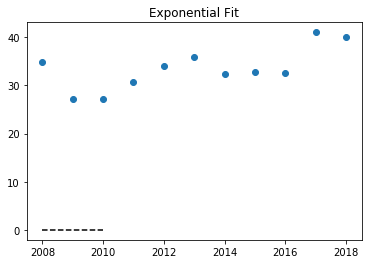

In [193]:
# Visualization
plt.scatter(x_samp, y_samp)
plt.plot(x_samp, np.exp(y_fit), "k--", label="Fit")     # 3
plt.title("Exponential Fit")

In [169]:
model = LinearRegression()
model.fit(x_poly, y)
y_poly_pred = model.predict(x_poly)

In [170]:
rmse = np.sqrt(mean_squared_error(y,y_poly_pred))
r2 = r2_score(y,y_poly_pred)
print(rmse)
print(r2)

2.7661972784613558
0.5709237829729827


In [171]:
x_predict = np.array([[2019],[2020]])

In [172]:
x_test = polynomial_features.fit_transform(x_pre)

In [173]:
y_pre = model.predict(x_test)

In [174]:
y_pre

array([[41.49143173],
       [42.9358065 ]])

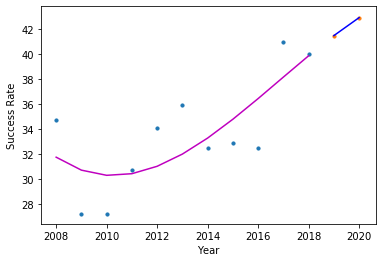

In [194]:
plt.scatter(x, y, s=10)
sort_axis = operator.itemgetter(0)
sorted_zip = sorted(zip(x,y_poly_pred), key=sort_axis)
x, y_poly_pred = zip(*sorted_zip)
plt.plot(x, y_poly_pred, color='m')

plt.scatter(x_pre, y_pre, s=10)
plt.plot(x_pre, y_pre, color='b')
plt.xlabel('Year')
plt.ylabel('Success Rate')
plt.show()

In [180]:
def model_success_rate(clinic):
    
    model = Pipeline([('poly', PolynomialFeatures(degree=3)), 
                  ('linear', LinearRegression(fit_intercept=False))])
    
    x = df[df.ClinicNames == clinic]['Year'].values.reshape(-1,1)
    y = df[df.ClinicNames == clinic]['ND_TransLB1'].values.reshape(-1,1)
    
    polynomial_features= PolynomialFeatures(degree=3)
    x_poly = polynomial_features.fit_transform(x)
    
    model = LinearRegression()
    model.fit(x_poly, y)
    y_poly_pred = model.predict(x_poly) 
    
    x_predict = np.array([[2019],[2020]])
    x_test = polynomial_features.fit_transform(x_predict)
    y_pre = model.predict(x_test)
    
    plt.scatter(x, y, s=10)
    sort_axis = operator.itemgetter(0)
    sorted_zip = sorted(zip(x,y_poly_pred), key=sort_axis)
    x, y_poly_pred = zip(*sorted_zip)
    plt.plot(x, y_poly_pred, color='m')

    plt.scatter(x_predict, y_pre, s=10)
    plt.plot(x_pre, y_pre, color='b')
    plt.xlabel('Year')
    plt.ylabel('Success Rate')
    plt.show()
    return y_pre[0],
    

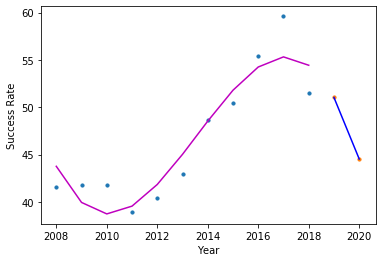

In [195]:
model_success_rate(df,"CLEVELAND CLINIC FERTILITY CENTER BEACHWOOD")

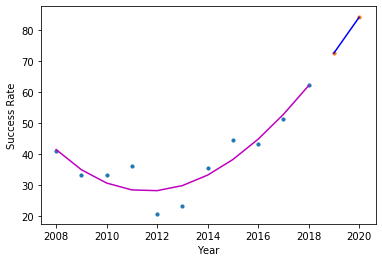

In [186]:
model_success_rate(df,"YALE FERTILITY CENTER NEW HAVEN")

In [182]:
df.ClinicNames.head(50)

0           ART FERTILITY PROGRAM OF ALABAMA BIRMINGHAM
1               CENTER FOR REPRODUCTIVE MEDICINE MOBILE
2                 WEST VALLEY FERTILITY CENTER GLENDALE
3     ARIZONA REPRODUCTIVE MEDICINE SPECIALISTS, LLC...
4                  FERTILITY TREATMENT CENTER, PC TEMPE
5     ARIZONA CENTER FOR REPRODUCTIVE ENDOCRINOLOGY ...
6                 ARKANSAS FERTILITY CENTER LITTLE ROCK
7     SOUTHERN CALIFORNIA REPRODUCTIVE CENTER BEVERL...
8                 CENTRAL CALIFORNIA IVF PROGRAM CLOVIS
9                   ZOUVES FERTILITY CENTER FOSTER CITY
10    CALIFORNIA IVF: DAVIS FERTILITY CENTER, INC. D...
11    THE FERTILITY INSTITUTES-LOS ANGELES, NEW YORK...
12          WEST COAST FERTILITY CENTER FOUNTAIN VALLEY
13    KAISER PERMANENTE CENTER FOR REPRODUCTIVE HEAL...
14        COASTAL FERTILITY MEDICAL CENTER, INC. IRVINE
15       FERTILITY CENTER OF SOUTHERN CALIFORNIA IRVINE
16                 REPRODUCTIVE FERTILITY CENTER IRVINE
17    REPRODUCTIVE PARTNERS–UCSD REGIONAL FERTIL

In [103]:
#SVR Model

In [7]:
from sklearn.svm import SVR

In [117]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

In [20]:
svr_rbf = SVR(kernel='rbf', C=100, gamma=0.1, epsilon=.1)
svr_lin = SVR(kernel='linear', C=100, gamma='auto')
svr_poly = SVR(kernel='poly', C=100, gamma='auto', degree=3, epsilon=.1,
               coef0=1)

In [21]:
X = data_plot['Year'].values.reshape(-1,1)
y = data_plot['ND_TransLB1'].values

In [ ]:
lw = 2
svrs = [svr_rbf, svr_lin, svr_poly]
kernel_label = ['RBF', 'Linear', 'Polynomial']
model_color = ['m', 'c', 'g']

fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(15, 10), sharey=True)
for ix, svr in enumerate(svrs):
    axes[ix].plot(X, svr.fit(X, y).predict(X), color=model_color[ix], lw=lw,
                  label='{} model'.format(kernel_label[ix]))
    axes[ix].scatter(X[svr.support_], y[svr.support_], facecolor="none",
                     edgecolor=model_color[ix], s=50,
                     label='{} support vectors'.format(kernel_label[ix]))
    axes[ix].scatter(X[np.setdiff1d(np.arange(len(X)), svr.support_)],
                     y[np.setdiff1d(np.arange(len(X)), svr.support_)],
                     facecolor="none", edgecolor="k", s=50,
                     label='other training data')
    axes[ix].legend(loc='upper center', bbox_to_anchor=(0.5, 1.1),
                    ncol=1, fancybox=True, shadow=True)

fig.text(0.5, 0.04, 'data', ha='center', va='center')
fig.text(0.06, 0.5, 'target', ha='center', va='center', rotation='vertical')
fig.suptitle("Support Vector Regression", fontsize=14)
plt.show()

In [100]:
X = data_plot['Year'].values.reshape(-1,1)
y = data_plot['ND_TransLB1'].values.reshape(-1,1)

In [97]:
X

array([[2008.],
       [2009.],
       [2010.],
       [2011.],
       [2012.],
       [2013.],
       [2014.],
       [2015.],
       [2016.],
       [2017.],
       [2018.]])

In [98]:
# Bayesian

In [99]:
from sklearn.linear_model import BayesianRidge, LinearRegression

In [101]:
clf = BayesianRidge(compute_score=True)
clf.fit(X, y)

/Users/jacobberger/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


BayesianRidge(compute_score=True)

In [102]:
ols = LinearRegression()
ols.fit(X, y)

LinearRegression()

IndexError: index 12 is out of bounds for axis 0 with size 1

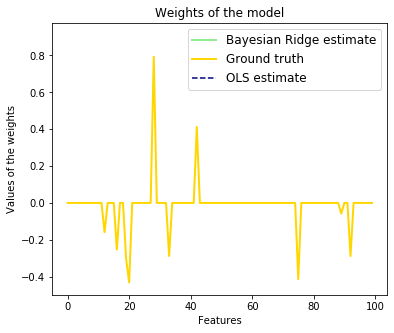

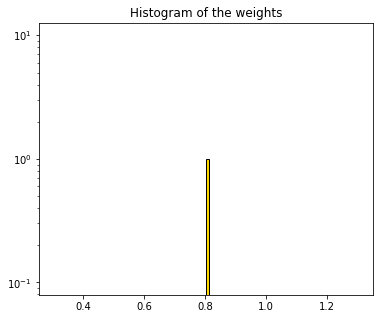

In [103]:
lw = 2
plt.figure(figsize=(6, 5))
plt.title("Weights of the model")
plt.plot(clf.coef_, color='lightgreen', linewidth=lw,
         label="Bayesian Ridge estimate")
plt.plot(w, color='gold', linewidth=lw, label="Ground truth")
plt.plot(ols.coef_, color='navy', linestyle='--', label="OLS estimate")
plt.xlabel("Features")
plt.ylabel("Values of the weights")
plt.legend(loc="best", prop=dict(size=12))

plt.figure(figsize=(6, 5))
plt.title("Histogram of the weights")
plt.hist(clf.coef_, bins=n_features, color='gold', log=True,
         edgecolor='black')
plt.scatter(clf.coef_[relevant_features], np.full(len(relevant_features), 5.),
            color='navy', label="Relevant features")
plt.ylabel("Features")
plt.xlabel("Values of the weights")
plt.legend(loc="upper left")

plt.figure(figsize=(6, 5))
plt.title("Marginal log-likelihood")
plt.plot(clf.scores_, color='navy', linewidth=lw)
plt.ylabel("Score")
plt.xlabel("Iterations")

In [15]:
# Plotting some predictions for polynomial regression
def f(x, noise_amount):
    y = np.sqrt(x) * np.sin(x)
    noise = np.random.normal(0, 1, len(x))
    return y + noise_amount * noise

In [104]:
degree = 10
#X = np.linspace(0, 10, 100)
#y = f(X, noise_amount=0.1)
clf_poly = BayesianRidge()
clf_poly.fit(np.vander(X, degree), y)

#X_plot = np.linspace(2008, 2018, 1)
y_plot = f(X_plot, noise_amount=0)
y_mean, y_std = clf_poly.predict(np.vander(X_plot, degree), return_std=True)
plt.figure(figsize=(6, 5))
plt.errorbar(X_plot, y_mean, y_std, color='navy',
             label="Polynomial Bayesian Ridge Regression", linewidth=lw)
plt.plot(X_plot, y_plot, color='gold', linewidth=lw,
         label="Ground Truth")
plt.ylabel("Output y")
plt.xlabel("Feature X")
plt.legend(loc="lower left")
plt.show()

ValueError: x must be a one-dimensional array or sequence.

In [22]:
# pymc3 Model


In [25]:
def add_clinic_id(df):
    n=0
    clinic_dict = {}
    # Create unique ID for each clinic
    for name in df['ClinicNames']:
        if name not in clinic_dict:
            clinic_dict.update({name:n})
            n += 1
            
    # Add column to df
    list_of_ids = []
    for name in df['ClinicNames']:
        list_of_ids.append(clinic_dict[name])
    df['ClinicID'] = list_of_ids
    return df

In [24]:
# Convert years to 0 an 1
def convert_year(df):
    list_of_years =[]
    for y in df['Year']:
        if y == 2017:
            list_of_years.append(0)
        else:
            list_of_years.append(1)
    df['NewYear'] = list_of_years

In [29]:
df_test = add_clinic_id(df)

In [39]:
# Convert years to 0 to 10
dic_year = {2008:0,2009:1,2010:2,2011:3,2012:4,2013:5,2014:6,2015:7,2016:8,2017:9,2018:10}
def convert_year(df):
    list_of_years =[]
    for y in df['Year']:
        list_of_years.append(dic_year[y])
        
    df['NewYear'] = list_of_years

In [40]:
convert_year(df_test)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1a25c0b050>]],
      dtype=object)

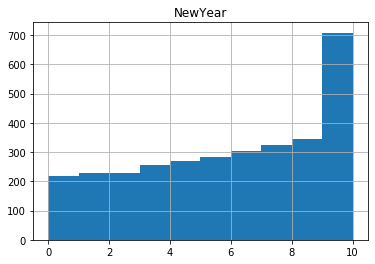

In [41]:
df_test.hist('NewYear')

In [77]:
# hierarchical_model

In [217]:
clinic_idx = df_test.ClinicID.values

with pm.Model() as hierarchical_model:
    
    # Hyperpriors for group nodes
    mu_a = pm.Normal('mu_alpha', mu=0., sigma=1)
    sigma_a = pm.HalfCauchy('sigma_alpha', beta=10)
    
    mu_b = pm.Normal('mu_beta', mu=0., sigma=1)
    sigma_b = pm.HalfCauchy('sigma_beta', beta = 10)

    # Intercept for each clinic, distributed around group mean mu_a
    # Above we just set mu and sd to a fixed value while here we
    # plug in a common group distribution for all a and b (which are
    # vectors of length n_clinics).
    
    a = pm.Normal('alpha', mu=mu_a, sigma=sigma_a, shape=len(df_test.ClinicNames.unique()))
    # Slope for each county, distributed around group mean mu_b
    b = pm.Normal('beta', mu=mu_b, sigma=sigma_b, shape=len(df_test.ClinicNames.unique()))
    
    # Add other priors
    

    # Model error
    eps = pm.HalfCauchy('eps', 5.)

    success_est = (a[clinic_idx] +
                   b[clinic_idx]*df_test.NewYear.values)

    # Data likelihood
    success_like = pm.Normal('success_like', mu=success_est,
                           sigma=eps, observed=df_test.ND_TransLB1)

/Users/jacobberger/anaconda3/lib/python3.7/site-packages/pymc3/model.py:1430: ImputationWarning: Data in success_like contains missing values and will be automatically imputed from the sampling distribution.
  warnings.warn(impute_message, ImputationWarning)


In [218]:
with hierarchical_model:
    hierarchical_trace = pm.sample(2000, tune=3000, target_accept=.8, discard_tuned_samples=True)

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [success_like_missing, eps, beta, alpha, sigma_beta, mu_beta, sigma_alpha, mu_alpha]
Sampling 4 chains, 0 divergences: 100%|██████████| 20000/20000 [06:34<00:00, 50.73draws/s]
The number of effective samples is smaller than 25% for some parameters.


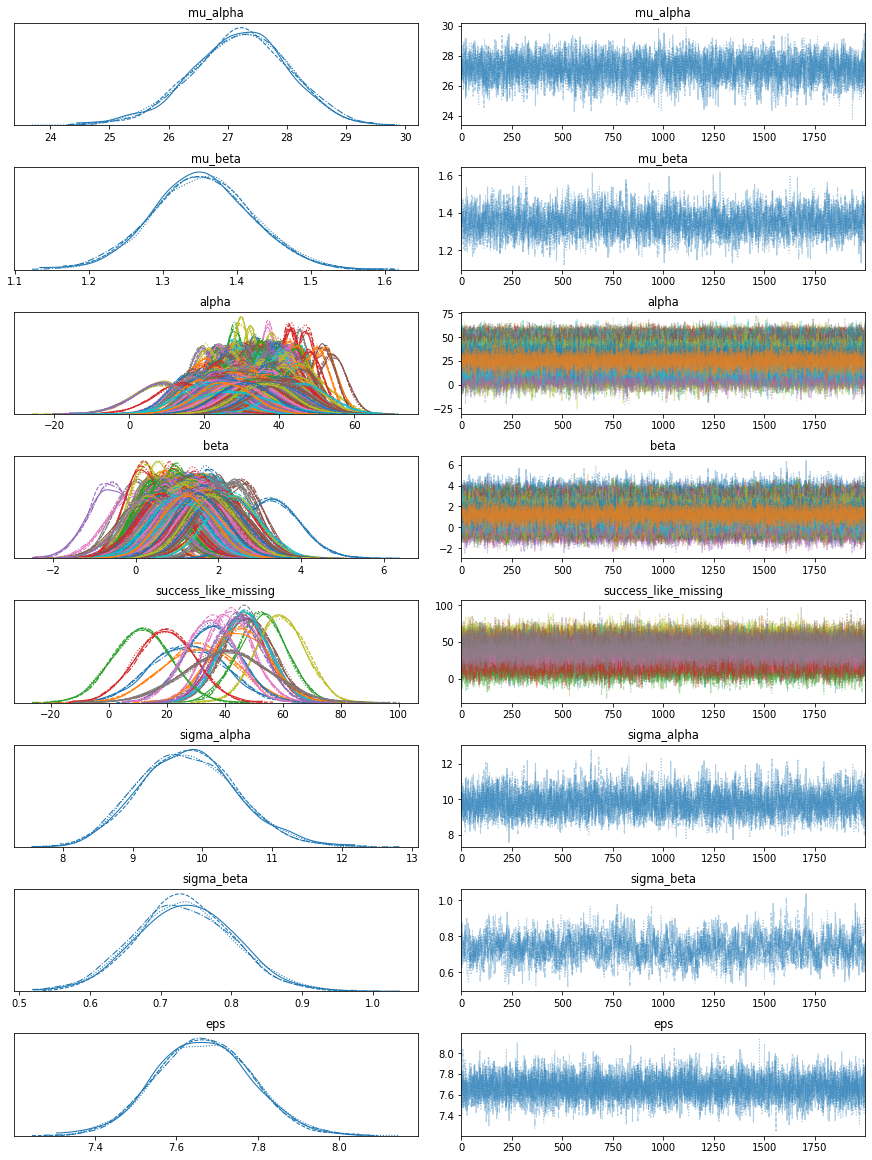

In [224]:
pm.traceplot(hierarchical_trace);

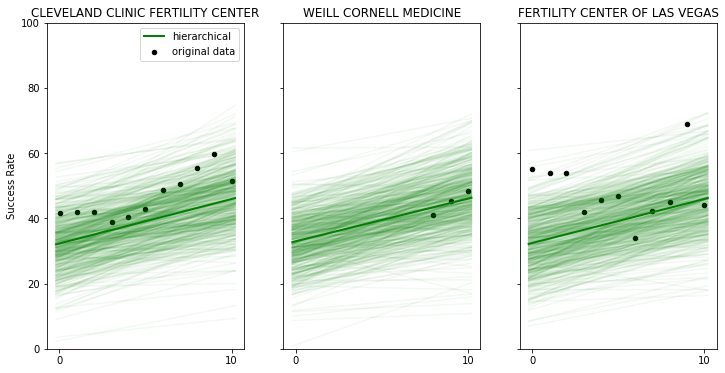

In [226]:
selection = ['CLEVELAND CLINIC FERTILITY CENTER', 'WEILL CORNELL MEDICINE', 'FERTILITY CENTER OF LAS VEGAS']
fig, axis = plt.subplots(1, 3, figsize=(12, 6), sharey=True, sharex=True)
axis = axis.ravel()
for i, c in enumerate(selection):
    c_data = df_test.loc[df_test.PrevClinName1 == c]
    c_data = c_data.reset_index(drop = True)
    z = list(c_data['ClinicID'])[0]

    xvals = np.linspace(-0.2, 10.2)
    #for a_val, b_val in zip(indiv_traces[c]['alpha'][::10], indiv_traces[c]['beta'][::10]):
    #    axis[i].plot(xvals, a_val + b_val * xvals, 'b', alpha=.05)
    #axis[i].plot(xvals, indiv_traces[c]['alpha'][::10].mean() + indiv_traces[c]['beta'][::10].mean() * xvals, 
    #             'b', alpha=1, lw=2., label='individual')
    for a_val, b_val in zip(hierarchical_trace['alpha'][::10][z], hierarchical_trace['beta'][::10][z]):
        axis[i].plot(xvals, a_val + b_val * xvals, 'g', alpha=.05)
    axis[i].plot(xvals, hierarchical_trace['alpha'][::10][z].mean() + hierarchical_trace['beta'][::10][z].mean() * xvals, 
                 'g', alpha=1, lw=2., label='hierarchical')
    axis[i].scatter(c_data.NewYear + np.random.randn(len(c_data))*0.01, c_data.ND_TransLB1, 
                    alpha=1, color='k', marker='.', s=80, label='original data')
    axis[i].set_xticks([0,10])
    #axis[i].set_xticklabels(['2017', '2018'])
    axis[i].set_ylim(0, 100)
    axis[i].set_title(c)
    if not i%3:
        axis[i].legend()
        axis[i].set_ylabel('Success Rate')

In [223]:
hierarchical_trace.stat_names

{'depth',
 'diverging',
 'energy',
 'energy_error',
 'max_energy_error',
 'mean_tree_accept',
 'model_logp',
 'step_size',
 'step_size_bar',
 'tree_size',
 'tune'}

/Users/jacobberger/anaconda3/lib/python3.7/site-packages/pymc3/plots/__init__.py:21: UserWarning: Keyword argument `varnames` renamed to `var_names`, and will be removed in pymc3 3.8
  warnings.warn('Keyword argument `{old}` renamed to `{new}`, and will be removed in pymc3 3.8'.format(old=old, new=new))


<Figure size 576x4320 with 0 Axes>

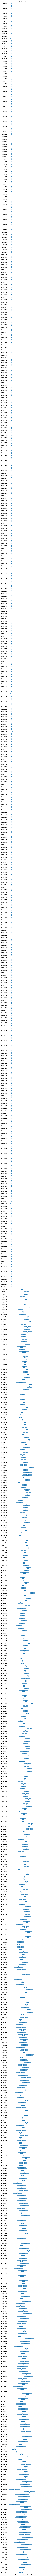

In [76]:
plt.figure(figsize=(8, 60))
pm.forestplot(hierarchical_trace, varnames=['beta', 'alpha'])
pass

In [ ]:
# Partially pooled Model

In [ ]:
clinic_idx = df_test.ClinicID.values

with pm.Model() as hierarchical_model:
    
    # Hyperpriors for group nodes
    #mu_a = pm.Poisson('mu_alpha', mu=0., sigma=1)
    #sigma_a = pm.HalfCauchy('sigma_alpha', beta=10)
    
    mu_b = pm.Poisson('mu_beta', mu=0., sigma=1)
    sigma_b = pm.HalfCauchy('sigma_beta', beta = 10)

    # Intercept for each clinic, distributed around group mean mu_a
    # Above we just set mu and sd to a fixed value while here we
    # plug in a common group distribution for all a and b (which are
    # vectors of length n_clinics).
    
    #a = pm.Normal('alpha', mu=mu_a, sigma=sigma_a, shape=len(df_test.ClinicNames.unique()))
    a = pm.Normal('alpha', mu=0, sigma=10)
    
    # Slope for each county, distributed around group mean mu_b
    b = pm.Normal('beta', mu=mu_b, sigma=sigma_b, shape=len(df_test.ClinicNames.unique()))
    
    #Add in % Frozen Transfer
    c = pm.Normal('FrozenTrans', mu=0, sigma=10)
    
    # Add other priors
    

    # Model error
    eps = pm.HalfCauchy('eps', 5.)

    success_est = (a[clinic_idx] +
                   +
                   b[clinic_idx] + c[clinic_idx])

    # Data likelihood
    success_like = pm.Normal('success_like', mu=success_est,
                           sigma=eps, observed=df_test.ND_TransLB1)

In [ ]:
#  Unpooled Model

In [79]:
from sklearn.linear_model import BayesianRidge, LinearRegression
from scipy import stats

In [80]:
np.random.seed(0)
n_samples, n_features = 100, 100
X = np.random.randn(n_samples, n_features)  # Create Gaussian data
# Create weights with a precision lambda_ of 4.
lambda_ = 4.
w = np.zeros(n_features)
# Only keep 10 weights of interest
relevant_features = np.random.randint(0, n_features, 10)
for i in relevant_features:
    w[i] = stats.norm.rvs(loc=0, scale=1. / np.sqrt(lambda_))
# Create noise with a precision alpha of 50.
alpha_ = 50.
noise = stats.norm.rvs(loc=0, scale=1. / np.sqrt(alpha_), size=n_samples)
# Create the target
y = np.dot(X, w) + noise

In [84]:
X

array([ 0.        ,  0.1010101 ,  0.2020202 ,  0.3030303 ,  0.4040404 ,
        0.50505051,  0.60606061,  0.70707071,  0.80808081,  0.90909091,
        1.01010101,  1.11111111,  1.21212121,  1.31313131,  1.41414141,
        1.51515152,  1.61616162,  1.71717172,  1.81818182,  1.91919192,
        2.02020202,  2.12121212,  2.22222222,  2.32323232,  2.42424242,
        2.52525253,  2.62626263,  2.72727273,  2.82828283,  2.92929293,
        3.03030303,  3.13131313,  3.23232323,  3.33333333,  3.43434343,
        3.53535354,  3.63636364,  3.73737374,  3.83838384,  3.93939394,
        4.04040404,  4.14141414,  4.24242424,  4.34343434,  4.44444444,
        4.54545455,  4.64646465,  4.74747475,  4.84848485,  4.94949495,
        5.05050505,  5.15151515,  5.25252525,  5.35353535,  5.45454545,
        5.55555556,  5.65656566,  5.75757576,  5.85858586,  5.95959596,
        6.06060606,  6.16161616,  6.26262626,  6.36363636,  6.46464646,
        6.56565657,  6.66666667,  6.76767677,  6.86868687,  6.96

In [85]:
y

array([ 0.11219021,  0.18989787,  0.15439728,  0.15038585,  0.2550045 ,
        0.43013531,  0.41530737,  0.56548787,  0.85537197,  0.70982535,
        0.85369361,  1.08237549,  1.01813397,  1.20659928,  1.12943738,
        1.24320066,  1.29152872,  1.49156987,  1.32381454,  1.30110206,
        1.27301331,  1.32923981,  1.21149768,  1.18906525,  1.00014559,
        0.97081175,  0.75979574,  0.85843101,  0.55588019,  0.31509156,
        0.05343861,  0.03445656, -0.07811871, -0.19055412, -0.61521537,
       -0.79419235, -1.00375351, -1.13743018, -1.26302013, -1.41708709,
       -1.49561597, -1.68248579, -1.84351838, -1.80012127, -2.06139865,
       -2.24251953, -1.95216071, -2.16841525, -2.20166758, -2.0920559 ,
       -2.07507978, -2.15563675, -2.01600182, -1.59453449, -1.49953977,
       -1.37174494, -1.46279271, -1.10406844, -0.96111477, -0.55406415,
       -0.55801304, -0.42200082, -0.12459602,  0.32219173,  0.39049641,
        0.6659093 ,  0.74766215,  1.23394677,  1.3274971 ,  1.70

In [81]:
# Fit the Bayesian Ridge Regression and an OLS for comparison
clf = BayesianRidge(compute_score=True)
clf.fit(X, y)

ols = LinearRegression()
ols.fit(X, y)

LinearRegression()

Text(0.5, 0, 'Iterations')

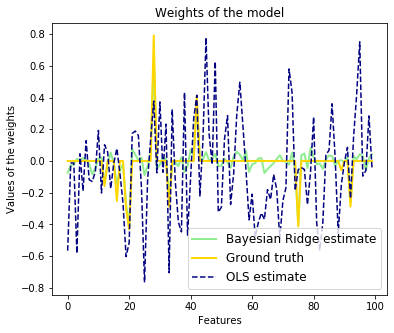

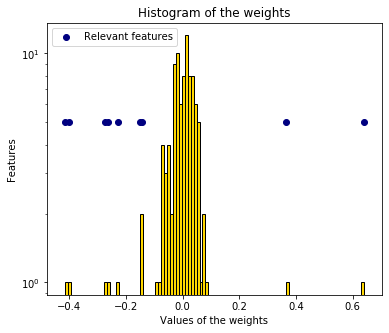

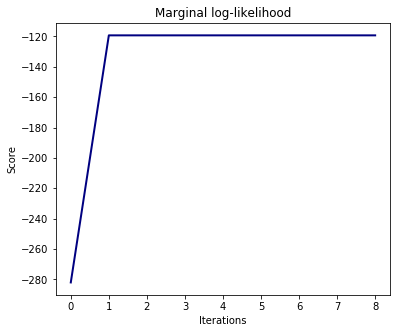

In [82]:
# Plot true weights, estimated weights, histogram of the weights, and
# predictions with standard deviations
lw = 2
plt.figure(figsize=(6, 5))
plt.title("Weights of the model")
plt.plot(clf.coef_, color='lightgreen', linewidth=lw,
         label="Bayesian Ridge estimate")
plt.plot(w, color='gold', linewidth=lw, label="Ground truth")
plt.plot(ols.coef_, color='navy', linestyle='--', label="OLS estimate")
plt.xlabel("Features")
plt.ylabel("Values of the weights")
plt.legend(loc="best", prop=dict(size=12))

plt.figure(figsize=(6, 5))
plt.title("Histogram of the weights")
plt.hist(clf.coef_, bins=n_features, color='gold', log=True,
         edgecolor='black')
plt.scatter(clf.coef_[relevant_features], np.full(len(relevant_features), 5.),
            color='navy', label="Relevant features")
plt.ylabel("Features")
plt.xlabel("Values of the weights")
plt.legend(loc="upper left")

plt.figure(figsize=(6, 5))
plt.title("Marginal log-likelihood")
plt.plot(clf.scores_, color='navy', linewidth=lw)
plt.ylabel("Score")
plt.xlabel("Iterations")

In [105]:
# Plotting some predictions for polynomial regression
#def f(x, noise_amount):
#    y = np.sqrt(x) * np.sin(x)
#    noise = np.random.normal(0, 1, len(x))
#    return y + noise_amount * noise


degree = 10
#X = np.linspace(2000, 2020, 1)
#y = f(X, noise_amount=0.1)
clf_poly = BayesianRidge()
clf_poly.fit(np.vander(X, degree), y)

#X_plot = np.linspace(2000, 2010, 25)
#y_plot = f(X_plot, noise_amount=0)
y_mean, y_std = clf_poly.predict(np.vander(X, degree), return_std=True)
plt.figure(figsize=(6, 5))
plt.errorbar(X, y_mean, y_std, color='navy',
             label="Polynomial Bayesian Ridge Regression", linewidth=lw)
plt.plot(X, y, color='gold', linewidth=lw,
         label="Ground Truth")
plt.ylabel("Output y")
plt.xlabel("Feature X")
plt.legend(loc="lower left")
plt.show()

ValueError: x must be a one-dimensional array or sequence.

In [159]:
X = data_plot['Year'].values#.reshape(-1,1)
y = data_plot['ND_TransLB1'].values#.reshape(-1,1)

In [160]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

ValueError: x and y must be the same size

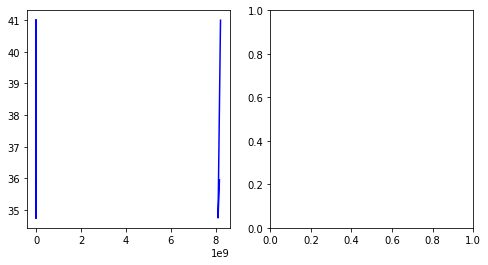

In [161]:
#size = 25
#rng = np.random.RandomState(1234)
#x_train = X #rng.uniform(0., 1., size)
#y_train = y #func(x_train) + rng.normal(scale=0.1, size=size)
#x_test = np.linspace(2019, 2020, 2)


# #############################################################################
# Fit by cubic polynomial
n_order = 3
X_train = np.vander(X_train, n_order + 1, increasing=True)
X_test = np.vander(X_test, n_order + 1, increasing=True)

# #############################################################################
# Plot the true and predicted curves with log marginal likelihood (L)
reg = BayesianRidge(tol=1e-6, fit_intercept=False, compute_score=True)
fig, axes = plt.subplots(1, 2, figsize=(8, 4))
for i, ax in enumerate(axes):
    # Bayesian ridge regression with different initial value pairs
    if i == 0:
        init = [1 / np.var(y_train), 1.]  # Default values
    elif i == 1:
        init = [1., 1e-3]
        reg.set_params(alpha_init=init[0], lambda_init=init[1])
    reg.fit(X_train, y_train)
    ymean, ystd = reg.predict(X_test, return_std=True)

    ax.plot(X_test, y_test, color="blue", label="sin($2\\pi x$)")
    ax.scatter(X_train, y_train, s=50, alpha=0.5, label="observation")
    ax.plot(X_test, ymean, color="red", label="predict mean")
    ax.fill_between(X_test, ymean-ystd, ymean+ystd,
                    color="pink", alpha=0.5, label="predict std")
    ax.set_ylim(-.3, 100)
    ax.legend()
    title = "$\\alpha$_init$={:.2f},\\ \\lambda$_init$={}$".format(
            init[0], init[1])
    if i == 0:
        title += " (Default)"
    ax.set_title(title, fontsize=12)
    text = "$\\alpha={:.1f}$\n$\\lambda={:.3f}$\n$L={:.1f}$".format(
           reg.alpha_, reg.lambda_, reg.scores_[-1])
    ax.text(0.05, -1.0, text, fontsize=12)

plt.tight_layout()
plt.show()

In [158]:
X_train

array([[1.00000000e+00, 2.01800000e+03, 4.07232400e+06, 8.21794983e+09],
       [1.00000000e+00, 2.01000000e+03, 4.04010000e+06, 8.12060100e+09],
       [1.00000000e+00, 2.00900000e+03, 4.03608100e+06, 8.10848673e+09],
       [1.00000000e+00, 2.01600000e+03, 4.06425600e+06, 8.19354010e+09],
       [1.00000000e+00, 2.01200000e+03, 4.04814400e+06, 8.14486573e+09],
       [1.00000000e+00, 2.01500000e+03, 4.06022500e+06, 8.18135338e+09],
       [1.00000000e+00, 2.01100000e+03, 4.04412100e+06, 8.13272733e+09],
       [1.00000000e+00, 2.01400000e+03, 4.05619600e+06, 8.16917874e+09]])

In [144]:
y_train

array([40.  , 27.2 , 27.2 , 32.5 , 34.1 , 32.85, 30.7 , 32.45])

In [145]:
z_train = np.vander(X_train, n_order + 1, increasing=True)

In [146]:
z_train

array([[1.00000000e+00, 2.01800000e+03, 4.07232400e+06, 8.21794983e+09],
       [1.00000000e+00, 2.01000000e+03, 4.04010000e+06, 8.12060100e+09],
       [1.00000000e+00, 2.00900000e+03, 4.03608100e+06, 8.10848673e+09],
       [1.00000000e+00, 2.01600000e+03, 4.06425600e+06, 8.19354010e+09],
       [1.00000000e+00, 2.01200000e+03, 4.04814400e+06, 8.14486573e+09],
       [1.00000000e+00, 2.01500000e+03, 4.06022500e+06, 8.18135338e+09],
       [1.00000000e+00, 2.01100000e+03, 4.04412100e+06, 8.13272733e+09],
       [1.00000000e+00, 2.01400000e+03, 4.05619600e+06, 8.16917874e+09]])

In [197]:
import time

import numpy as np

from sklearn.svm import SVR
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import learning_curve
from sklearn.kernel_ridge import KernelRidge
import matplotlib.pyplot as plt

In [198]:
X_plot = np.linspace(2000, 2016, 16)[:, None]

# #############################################################################
# Fit regression model
train_size = 100
svr = GridSearchCV(SVR(kernel='rbf', gamma=0.1),
                   param_grid={"C": [1e0, 1e1, 1e2, 1e3],
                               "gamma": np.logspace(-2, 2, 5)})

kr = GridSearchCV(KernelRidge(kernel='rbf', gamma=0.1),
                  param_grid={"alpha": [1e0, 0.1, 1e-2, 1e-3],
                              "gamma": np.logspace(-2, 2, 5)})

t0 = time.time()
svr.fit(X[:train_size], y[:train_size])
svr_fit = time.time() - t0
print("SVR complexity and bandwidth selected and model fitted in %.3f s"
      % svr_fit)

t0 = time.time()
kr.fit(X[:train_size], y[:train_size])
kr_fit = time.time() - t0
print("KRR complexity and bandwidth selected and model fitted in %.3f s"
      % kr_fit)

sv_ratio = svr.best_estimator_.support_.shape[0] / train_size
print("Support vector ratio: %.3f" % sv_ratio)

t0 = time.time()
y_svr = svr.predict(X_plot)
svr_predict = time.time() - t0
print("SVR prediction for %d inputs in %.3f s"
      % (X_plot.shape[0], svr_predict))

t0 = time.time()
y_kr = kr.predict(X_plot)
kr_predict = time.time() - t0
print("KRR prediction for %d inputs in %.3f s"
      % (X_plot.shape[0], kr_predict))


# #############################################################################
# Look at the results
sv_ind = svr.best_estimator_.support_
plt.scatter(X[sv_ind], y[sv_ind], c='r', s=50, label='SVR support vectors',
            zorder=3, edgecolors=(0, 0, 0))
plt.scatter(X, y, c='k', label='data', zorder=1,
            edgecolors=(0, 0, 0))
plt.plot(X_plot, y_svr, c='r',
         label='SVR (fit: %.3fs, predict: %.3fs)' % (svr_fit, svr_predict))
plt.plot(X_plot, y_kr, c='g',
         label='KRR (fit: %.3fs, predict: %.3fs)' % (kr_fit, kr_predict))
plt.xlabel('data')
plt.ylabel('target')
plt.title('SVR versus Kernel Ridge')
plt.legend()

# Visualize training and prediction time
plt.figure()

# Generate sample data
X = 5 * rng.rand(10000, 1)
y = np.sin(X).ravel()
y[::5] += 3 * (0.5 - rng.rand(X.shape[0] // 5))
sizes = np.logspace(1, 4, 7).astype(np.int)
for name, estimator in {"KRR": KernelRidge(kernel='rbf', alpha=0.1,
                                           gamma=10),
                        "SVR": SVR(kernel='rbf', C=1e1, gamma=10)}.items():
    train_time = []
    test_time = []
    for train_test_size in sizes:
        t0 = time.time()
        estimator.fit(X[:train_test_size], y[:train_test_size])
        train_time.append(time.time() - t0)

        t0 = time.time()
        estimator.predict(X_plot[:1000])
        test_time.append(time.time() - t0)

    plt.plot(sizes, train_time, 'o-', color="r" if name == "SVR" else "g",
             label="%s (train)" % name)
    plt.plot(sizes, test_time, 'o--', color="r" if name == "SVR" else "g",
             label="%s (test)" % name)

plt.xscale("log")
plt.yscale("log")
plt.xlabel("Train size")
plt.ylabel("Time (seconds)")
plt.title('Execution Time')
plt.legend(loc="best")

# Visualize learning curves
plt.figure()

svr = SVR(kernel='rbf', C=1e1, gamma=0.1)
kr = KernelRidge(kernel='rbf', alpha=0.1, gamma=0.1)
train_sizes, train_scores_svr, test_scores_svr = \
    learning_curve(svr, X[:100], y[:100], train_sizes=np.linspace(0.1, 1, 10),
                   scoring="neg_mean_squared_error", cv=10)
train_sizes_abs, train_scores_kr, test_scores_kr = \
    learning_curve(kr, X[:100], y[:100], train_sizes=np.linspace(0.1, 1, 10),
                   scoring="neg_mean_squared_error", cv=10)

plt.plot(train_sizes, -test_scores_svr.mean(1), 'o-', color="r",
         label="SVR")
plt.plot(train_sizes, -test_scores_kr.mean(1), 'o-', color="g",
         label="KRR")
plt.xlabel("Train size")
plt.ylabel("Mean Squared Error")
plt.title('Learning curves')
plt.legend(loc="best")

plt.show()

/Users/jacobberger/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:552: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/jacobberger/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/jacobberger/anaconda3/lib/python3.7/site-packages/sklearn/svm/_base.py", line 162, in fit
    accept_large_sparse=False)
  File "/Users/jacobberger/anaconda3/lib/python3.7/site-packages/sklearn/base.py", line 432, in _validate_data
    X, y = check_X_y(X, y, **check_params)
  File "/Users/jacobberger/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py", line 73, in inner_f
    return f(**kwargs)
  File "/Users/jacobberger/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py", line 803, in check_X_y
    

/Users/jacobberger/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:552: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/jacobberger/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/jacobberger/anaconda3/lib/python3.7/site-packages/sklearn/svm/_base.py", line 162, in fit
    accept_large_sparse=False)
  File "/Users/jacobberger/anaconda3/lib/python3.7/site-packages/sklearn/base.py", line 432, in _validate_data
    X, y = check_X_y(X, y, **check_params)
  File "/Users/jacobberger/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py", line 73, in inner_f
    return f(**kwargs)
  File "/Users/jacobberger/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py", line 803, in check_X_y
    

/Users/jacobberger/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:552: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/jacobberger/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/jacobberger/anaconda3/lib/python3.7/site-packages/sklearn/svm/_base.py", line 162, in fit
    accept_large_sparse=False)
  File "/Users/jacobberger/anaconda3/lib/python3.7/site-packages/sklearn/base.py", line 432, in _validate_data
    X, y = check_X_y(X, y, **check_params)
  File "/Users/jacobberger/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py", line 73, in inner_f
    return f(**kwargs)
  File "/Users/jacobberger/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py", line 803, in check_X_y
    

ValueError: Expected 2D array, got 1D array instead:
array=[2008. 2009. 2010. 2011. 2012. 2013. 2014. 2015. 2016. 2017. 2018.].
Reshape your data either using array.reshape(-1, 1) if your data has a single feature or array.reshape(1, -1) if it contains a single sample.

In [199]:
# Random forest regression

In [200]:
from sklearn.ensemble import RandomForestRegressor

In [201]:
regressor = RandomForestRegressor(n_estimators=4, random_state=0)

In [211]:
X = df[df['ClinicNames']=='ART FERTILITY PROGRAM OF ALABAMA BIRMINGHAM'].drop(['PrevClinName1','Unnamed: 0',
                                                                               'ClinCityCode','ClinicNames','ClinicID','ClinStateCode','ND_TransLB1'],axis=1)
y = df[df['ClinicNames']=='ART FERTILITY PROGRAM OF ALABAMA BIRMINGHAM']['ND_TransLB1']

In [212]:
y

0       34.75
218     27.20
445     27.20
672     30.70
929     34.10
1200    35.95
1484    32.45
1787    32.85
2112    32.50
2458    41.00
2810    40.00
Name: ND_TransLB1, dtype: float64

In [213]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [214]:
regressor.fit(X.reshape(-1,1),y.reshape(-1,1))

AttributeError: 'DataFrame' object has no attribute 'reshape'

In [227]:
X

,Year,ICSI_Rate,PGD_Rate,ND_TransLB2,ND_TransLB3,ND_TransLB4,TotNumCyclesAll,TransFrozEmbAll,NewYear
0,2008.0,87.0,1.0,20.700000,23.050000,0.000000,319.0,13.479624,0
218,2009.0,88.0,1.0,26.792857,31.250000,0.000000,286.0,19.930070,1
445,2010.0,88.0,1.0,26.792857,31.250000,0.000000,286.0,19.930070,2
672,2011.0,84.0,3.0,21.711111,23.900000,NaN,338.0,15.384615,3
929,2012.0,81.0,3.0,30.528571,12.650000,20.000000,346.0,13.583815,4
1200,2013.0,80.0,2.0,33.422222,33.478571,25.000000,411.0,18.248175,5
1484,2014.0,80.0,1.0,33.050000,41.650000,50.000000,449.0,24.276169,6
1787,2015.0,74.0,0.0,30.450000,11.111111,19.642857,424.0,31.132075,7
2112,2016.0,70.0,6.0,35.697059,19.650000,12.500000,376.0,25.000000,8
2458,2017.0,79.4,10.1,47.100000,37.500000,0.000000,405.0,56.900000,9


In [228]:
y

0       34.75
218     27.20
445     27.20
672     30.70
929     34.10
1200    35.95
1484    32.45
1787    32.85
2112    32.50
2458    41.00
2810    40.00
Name: ND_TransLB1, dtype: float64

In [229]:
import theano
import theano.tensor as tt

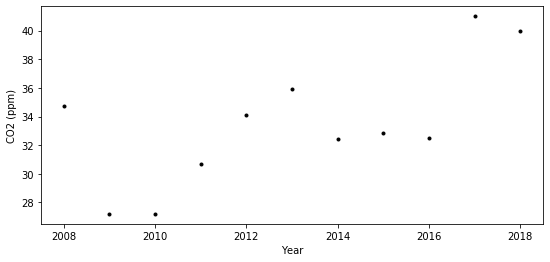

In [231]:
fig = plt.figure(figsize=(9,4))
ax = plt.gca()

ax.plot(X.Year.values, y.values, '.k');
ax.set_xlabel("Year")
ax.set_ylabel("CO2 (ppm)");

In [311]:
t = X.Year.values - 2008
t

array([ 0.,  1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10.])

In [312]:
y.reshape(-1,1)

array([[34.75],
       [27.2 ],
       [27.2 ],
       [30.7 ],
       [34.1 ],
       [35.95],
       [32.45],
       [32.85],
       [32.5 ],
       [41.  ],
       [40.  ]])

In [313]:
y_mu, y_sd = np.mean(y), np.std(y)
y_n = (y - y_mu) / y_sd

In [314]:
y_mu

33.51818181818182

In [315]:
y_n

array([ 0.29169614, -1.49615363, -1.49615363, -0.6673491 ,  0.1377753 ,
        0.57585769, -0.25294684, -0.15822632, -0.24110677,  1.77170423,
        1.53490293])

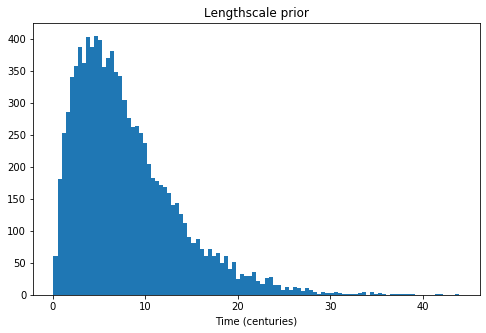

In [246]:
fig = plt.figure(figsize=(8,5))
ax = plt.gca()
ax.hist(pm.Gamma.dist(alpha=2, beta=.25).random(size=10000), 100)
ax.set_xlabel("Time (centuries)")
ax.set_title("Lengthscale prior");

In [316]:
with pm.Model() as model:
    nu = pm.HalfNormal("nu", sd=5)
    tao = pm.Gamma("tao", alpha=2, beta=0.25)
    cov = nu**2 * pm.gp.cov.Matern32(1, tao)
    gp = pm.gp.Marginal(cov_func=cov)

    # x location uncertainty (sd = 0.01 is a standard deviation of one year)
    t_diff = pm.Normal("t_diff", mu=0.0, sd=0.01, shape=len(t))
    t_uncert = t - t_diff

    # white noise variance
    sigma = pm.HalfNormal("sigma", sd=5, testval=1)
    y_ = gp.marginal_likelihood("y", X=t_uncert[:,None], y=y_n, noise=sigma)

/Users/jacobberger/anaconda3/lib/python3.7/site-packages/theano/tensor/basic.py:6611: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  result[diagonal_slice] = x


In [318]:
with model:
    tr = pm.sample(2000, tune = 1000, chains=4, cores=1,target_accept=.9, discard_tuned_samples=True)

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Sequential sampling (4 chains in 1 job)
NUTS: [sigma, t_diff, tao, nu]
Sampling chain 3, 10 divergences: 100%|██████████| 3000/3000 [00:32<00:00, 93.60it/s] 
/Users/jacobberger/anaconda3/lib/python3.7/site-packages/theano/tensor/basic.py:6611: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  result[diagonal_slice] = x
There were 20 divergences after tuning. Increase `target_accept` or reparameterize.
There were 34 divergences after tuning. Increase `target_accept` or reparameterize.
There were 114 divergences after tuning. Increase `target_accept` or reparameterize.
There were 124 divergences after tuning. Increase `target_accept` or reparameterize.


/Users/jacobberger/anaconda3/lib/python3.7/site-packages/pymc3/plots/__init__.py:21: UserWarning: Keyword argument `varnames` renamed to `var_names`, and will be removed in pymc3 3.8
  warnings.warn('Keyword argument `{old}` renamed to `{new}`, and will be removed in pymc3 3.8'.format(old=old, new=new))


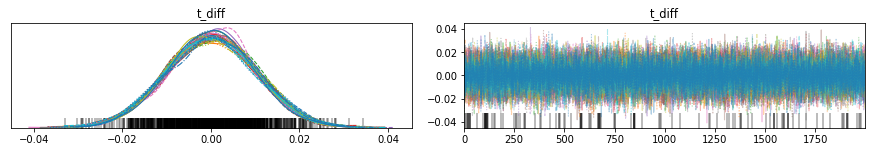

In [319]:
pm.traceplot(tr, varnames=["t_diff"]);

/Users/jacobberger/anaconda3/lib/python3.7/site-packages/pymc3/plots/__init__.py:21: UserWarning: Keyword argument `varnames` renamed to `var_names`, and will be removed in pymc3 3.8
  warnings.warn('Keyword argument `{old}` renamed to `{new}`, and will be removed in pymc3 3.8'.format(old=old, new=new))
/Users/jacobberger/anaconda3/lib/python3.7/site-packages/theano/tensor/basic.py:6611: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  result[diagonal_slice] = x


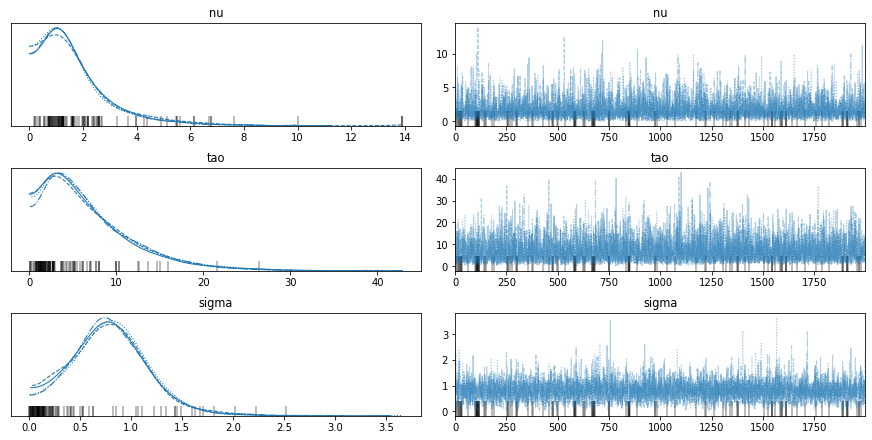

In [320]:
pm.traceplot(tr, varnames=["nu", "tao", "sigma"]);

In [325]:
#tnew = np.linspace(-100, 2150, 2000)/100
tnew = np.linspace(-1, 15, 17)
with model:
    ffnew = gp.conditional("ffnew", Xnew=tnew[:,None])

with model:
    ppc = pm.sample_ppc(tr, samples=2000, vars=[ffnew])

/Users/jacobberger/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:7: DeprecationWarning: sample_ppc() is deprecated.  Please use sample_posterior_predictive()
  import sys
/Users/jacobberger/anaconda3/lib/python3.7/site-packages/pymc3/sampling.py:1247: UserWarning: samples parameter is smaller than nchains times ndraws, some draws and/or chains may not be represented in the returned posterior predictive sample
  "samples parameter is smaller than nchains times ndraws, some draws "
100%|██████████| 2000/2000 [00:17<00:00, 111.53it/s]


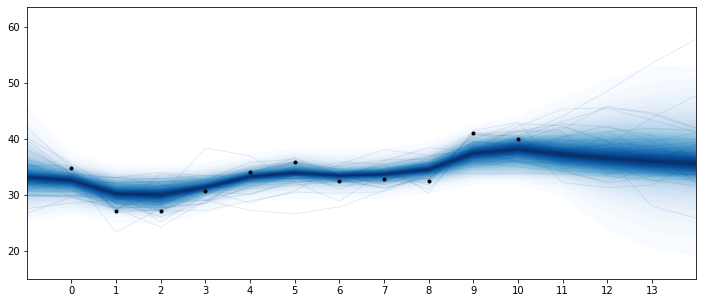

In [327]:
samples = y_sd * ppc["ffnew"] + y_mu

fig = plt.figure(figsize=(12,5))
ax = plt.gca()
pm.gp.util.plot_gp_dist(ax, samples, tnew, plot_samples=True, palette="Blues")
ax.plot(t, y, "k.");
ax.set_xticks(np.arange(0,14));
ax.set_xlim([-1, 14]);

In [335]:
samples[0][15]

37.30348227426794

In [336]:
samples[:][15].mean()

31.621093742992933